# Step 1 : Business understanding
* Objectives :

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Import dataset
data = pd.read_csv('train.csv')

# Step 2 : Exploratory Data Analysis (EDA)

In [3]:
# 1. Data Overview
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step 3 : Data Preprocessing
* Handle missing values, outliers, and inconsistencies.
* Encode categorical variables and normalize numerical features.

In [5]:
# 1. Handling Missing Values
# There is huge missing values in this columns so im droping this columns and ID column is irrelevent
data.drop(['Id','Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [6]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [8]:
# There are missing values in LotFrontage so im filling with mean
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [9]:
# 2. Fill categorical columns with mode
data.fillna(data.mode().iloc[0], inplace=True)

In [10]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [11]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

### All missing values are filled 

In [13]:
'''
RH: Residential High Density
RL: Residential Low Density
RP: Residential Low Density Park
RM: Residential Medium Density

# Define mapping
mapping = {'A': 0, 'B': 1, 'C': 2}  # Assign integers based on your preference/order

# Apply label encoding
data['MSZoning_encoded'] = data['MSZoning'].map(mapping)


# - - - - - - - -- - - -  -- - - - - - - - - - - - -- - -- - 


# Specify the columns to keep
columns_to_keep = ['KitchenAbvGr', 'TotRmsAbvGrd', 'PoolArea', 'LotArea', 'GrLivArea', 
                   'OverallQual', 'TotalBath', 'BedroomAbvGr', 'GarageArea', 
                   'TotalSF', 'YrSold', 'YearBuilt']

# Drop columns that are not in the specified list
data_subset = data.drop(columns=data.columns.difference(columns_to_keep), inplace=False)

# Check the resulting DataFrame
print(data_subset.head())

'''

"\nRH: Residential High Density\nRL: Residential Low Density\nRP: Residential Low Density Park\nRM: Residential Medium Density\n\n# Define mapping\nmapping = {'A': 0, 'B': 1, 'C': 2}  # Assign integers based on your preference/order\n\n# Apply label encoding\ndata['MSZoning_encoded'] = data['MSZoning'].map(mapping)\n"

In [14]:
# 3. Feature Engineering
# Create new features based on domain knowledge
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] 
data['YearSinceBuilt'] = data['YrSold'] - data['YearBuilt']
data['YearSinceRemod'] = data['YrSold'] - data['YearRemodAdd']
data['TotalBath'] = data['FullBath'] + data["HalfBath"]

In [15]:
# As we add new columns from existing
data.drop(['TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'YrSold', 'YearBuilt', 'YearRemodAdd','FullBath','HalfBath'], axis=1, inplace=True)

In [16]:
# Convert categorical values to numeric by dummy variables
data = pd.get_dummies(data, drop_first=True).astype(int)

In [17]:
data.shape

(1460, 226)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 226 entries, MSSubClass to SaleCondition_Partial
dtypes: int32(226)
memory usage: 1.3 MB


In [19]:
data.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 226, dtype: int64

### All categorical values are converted, so no categorical values
### No missing values 
### Now dataset is ready for modelling

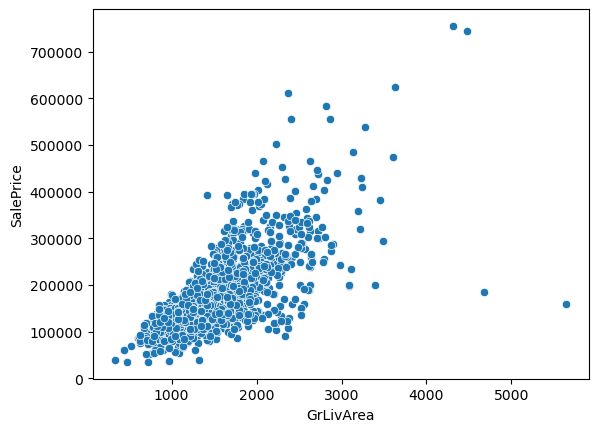

In [20]:
# Scatter plots of target variable against potential features
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [21]:
# # Correlation Analysis
# correlation = data.corr()
# sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.show()

In [22]:
# Save the cleaned data to a new CSV file
data.to_csv('cleaned_house_prices.csv', index=False)

# Step 4 : Model Building

In [23]:
# 1. Dividing/split dataset into Independent and Dependent variables
#X = data.drop('SalePrice', axis=1)
#y = data['SalePrice']

X = data[['LotArea','GrLivArea', 'OverallQual', 'TotalBath','BedroomAbvGr','GarageArea','TotalSF', 'YearSinceBuilt','YearSinceRemod']]
y = data['SalePrice']

In [24]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[-2.07141708e-01  3.70333439e-01  6.51479243e-01 ... -1.27658638e-03
  -1.04325937e+00 -8.69940995e-01]
 [-9.18863723e-02 -4.82511915e-01 -7.18361143e-02 ... -5.24067478e-02
  -1.83465064e-01  3.90140669e-01]
 [ 7.34799786e-02  5.15012562e-01  6.51479243e-01 ...  1.69157285e-01
  -9.77121342e-01 -8.21476316e-01]
 ...
 [-1.47810266e-01  1.56964722e+00  6.51479243e-01 ...  1.12602173e+00
   1.07315738e+00 -9.18405675e-01]
 [-8.01603947e-02 -8.32787685e-01 -7.95151472e-01 ... -5.00404352e-01
   7.75536272e-01 -4.33758881e-01]
 [-5.81115479e-02 -4.93933951e-01 -7.95151472e-01 ... -6.70153653e-02
   2.13363075e-01  9.71716822e-01]]


In [25]:
# 2. Training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape , X_test.shape

((1168, 9), (292, 9))

In [27]:
# 4. Model Selection
# A. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# B. Random Forest Regression
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Model Evaluation
# 1. Predict on Test Data
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([149068.26498815, 302396.08413967, 107661.28316851, 162591.66862597,
       295350.33557411,  64786.36520816, 214619.67047691, 160310.5831706 ,
        65664.21137106, 129572.72664827, 154478.6870059 , 106656.56459346,
       105278.59620606, 223020.94532376, 193795.69771485, 127236.23329868,
       215333.99478206, 134457.48709147, 123774.83469612, 221403.24663209,
       178023.46231564, 238413.16322322, 184131.74832366, 120287.72875605,
       218318.75877934, 177853.06069184, 206176.62327394,  92007.5184459 ,
       189153.4573531 , 212323.66433177, 121802.26294481, 254770.72786536,
       222825.25835573,  90683.15096943, 269439.50482359, 148181.57950175,
       161709.19629474, 220595.69416155, 289742.80506831,  93508.25397607,
       129870.01906816, 234636.31496823, 114897.96588306, 318641.18683765,
       124161.28420007, 154626.78480833, 113333.99382323, 115462.84844108,
       343780.34631201, 137441.51055019, 101454.98231101, 203543.73399071,
       119755.12240271, 3

In [30]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([142604.5       , 332624.48      , 106445.48      , 154258.5       ,
       310717.03      ,  78836.5       , 209692.15      , 151565.37      ,
        79175.5       , 137419.34      , 145888.5       , 119271.32      ,
       111981.        , 219070.5       , 181862.85      , 126897.25      ,
       194676.9       , 129831.        , 113689.        , 207164.55      ,
       190673.75      , 213090.98      , 176161.61      , 122371.75      ,
       195937.78      , 178657.87      , 175411.33      , 110119.16      ,
       183460.32      , 207704.32      , 119967.        , 241747.91      ,
       217025.        , 113418.5       , 266154.41      , 145901.5       ,
       164194.55      , 205959.81      , 312554.51      ,  99555.83      ,
       110236.        , 234943.87      , 120416.        , 384942.75      ,
       133801.5       , 150968.        , 115178.5       , 118804.49      ,
       385514.98      , 142245.5       , 116083.        , 168974.05      ,
       106682.57      , 3

In [31]:
# 2. Calculate Metrics
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - R-squared:", r2_lr)
print()
print()
print("Random Forest Regression - RMSE:", rmse_rf)
print("Random Forest Regression - R-squared:", r2_rf)

Linear Regression - RMSE: 38685.9537943165
Linear Regression - R-squared: 0.8048840452738935


Random Forest Regression - RMSE: 28894.480588407256
Random Forest Regression - R-squared: 0.8911531288341364


C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
a=

SyntaxError: invalid syntax (62411553.py, line 1)

In [ ]:
# Hyperparameter Tuning
# Using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
# Train the model with best hyperparameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

In [ ]:
# Evaluate the best model
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Tuned Random Forest Regression - RMSE:", rmse_best_rf)
print("Tuned Random Forest Regression - R-squared:", r2_best_rf)

In [ ]:
# Feature Importance
feature_importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
import joblib

# Save the trained RandomForest model
joblib.dump(model_rf, 'model_rf.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
import joblib

# Load the saved RandomForest model and scaler
loaded_model = joblib.load('model_rf.pkl')
loaded_scaler = joblib.load('scaler.pkl')

In [33]:
# Example: Predict house price for a new data point
new_data_point = pd.DataFrame([[8450, 1710, 7,3,3,548,2566,5,5]], columns=['LotArea','GrLivArea', 'OverallQual', 'TotalBath','BedroomAbvGr','GarageArea','TotalSF', 'YearSinceBuilt','YearSinceRemod'])
predicted_price = model_rf.predict(new_data_point)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")

Predicted Price for the new data point: $203828.28


In [37]:
# Create a DataFrame from new user input
input_data = pd.DataFrame({
    'LotArea': [8450],
    'GrLivArea': [1710],
    'OverallQual': [7],    
    'TotalBath': [3],
    'BedroomAbvGr': [3],
    'GarageArea': [548],
    'TotalSF': [2566],
    'YearSinceBuilt':[5],
    'YearSinceRemod':[5],
    # Add any other required features with default values if not provided
})


standardized_data = scaler.transform(input_data)

predicted_price = model_rf.predict(standardized_data)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")

Predicted Price for the new data point: $92402.91666666669


C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Create a DataFrame from new user input
new_data = pd.DataFrame({
    'LotArea': [8450],
    'GrLivArea': [1710],
    'OverallQual': [7],    
    'YearBuilt': [2003],
    'TotalBath': [3],
    'BedroomAbvGr': [3],
    'GarageArea': [548],
    'TotalSF': [2566],
    'YearSinceBuilt':[5],
    'YearSinceRemod':[5],
    # Add any other required features with default values if not provided
})

# Preprocess the new input data
new_data_preprocessed = standardized_data(new_data)

# Standardize the preprocessed data
standardized_data = scaler.transform(new_data_preprocessed)  # Use .values to get the array-like representation

prediction = regression.predict(standardized_data)
print(prediction)






'''
# Predict using the trained model
new_data_prediction = model.predict(standardized_data)

print("New Data Prediction:", new_data_prediction[0])
'''

In [ ]:
# Predicting on new data
new_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

X_train = scaler.transform(new_data)
new_data_prediction = regression.predict(X_train)
print("new_data_prediction")

In [ ]:
data.columns

In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor

# Load the trained model
model = joblib.load('model_rf.pkl')

# Example function to preprocess input data
def preprocess_input(data):
    # Fill missing values with the mode
    data.fillna(data.mode().iloc[0], inplace=True)

    # Feature Engineering (example)
    if {'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'}.issubset(data.columns):
        data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    if 'YearBuilt' in data.columns and 'YrSold' in data.columns:
        data['YearSinceBuilt'] = data['YrSold'] - data['YearBuilt']
    if 'YearRemodAdd' in data.columns and 'YrSold' in data.columns:
        data['YearSinceRemod'] = data['YrSold'] - data['YearRemodAdd']
    
    # Encode categorical features
    data = pd.get_dummies(data, drop_first=True)
    
    # Ensure the features match those used during model training
    with open('model_rf.pkl', 'rb') as f:
        model_rf = joblib.load(f)
    for feature in model_rf:
        if feature not in data.columns:
            data[feature] = 0  # Add missing feature with default value 0

    data = data[model_rf]  # Ensure the same order of columns
    
    return data

# Create a DataFrame from new user input
new_data = pd.DataFrame({
    'LotArea': [8450],
    'GrLivArea': [1710],
    'OverallQual': [7],    
    'YearBuilt': [2003],
    'TotalBath': [3],
    'BedroomAbvGr': [3],
    'GarageArea': [548],
    'TotalSF': [2566],
    'YearSinceBuilt':[5],
    'YearSinceRemod':[5],
    # Add any other required features with default values if not provided
})

# Preprocess the new input data
new_data_preprocessed = preprocess_input(new_data)

# Predict using the trained model
new_data_prediction = model.predict(new_data_preprocessed)

print("Predicted Sale Price:", new_data_prediction[0])


In [ ]:
input_data = {
    'LotArea': 8450,
    'GrLivArea': 1710,
    'OverallQual': 7,
    'YearBuilt': 2003,
    'TotalBath': 3,
    'BedroomAbvGr': 3,
    'GarageArea': 548,
    'TotalSF': 2566,
    'YearSinceBuilt':5,
    'YearSinceRemod':5
    # Add all other necessary features...
}

standardized_data = scaler.transform(input_data)
new_data_prediction = regression.predict(standardized_data)
print("new_data_prediction")

# prediction = predict(input_data)
# print("Predicted Sale Price:", prediction)